In [33]:
import pandas as pd
df = pd.read_csv('results.csv')
df

,Unnamed: 0,llama_s_val,olmo_s_val,stable_s_val,llama_confidence,olmo_confidence,stable_confidence,lowest_s_val_model,lowest_s_val_model_answer,highest_confidence_model,highest_confidence_model_answer,is_base_model_correct
0,0,0.437823,0.414899,0.268941,0.76,0.86,0.96,stable,True,stable,True,False
1,1,0.500000,0.445530,0.245085,0.65,0.82,0.97,stable,True,stable,True,True
2,2,0.468791,0.362969,0.268941,0.71,0.92,0.96,stable,True,stable,True,True
3,3,0.437823,0.341582,0.377541,0.76,0.95,0.89,olmo,True,olmo,True,True
4,4,0.392337,0.327668,0.468791,0.86,0.96,0.82,olmo,False,olmo,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
543,543,0.392337,0.437823,0.164516,0.86,0.83,0.99,stable,True,stable,True,False
544,544,0.407333,0.496094,0.348645,0.83,0.73,0.91,stable,True,stable,True,True
545,545,0.362969,0.372049,0.320821,0.89,0.92,0.93,stable,True,stable,True,False
546,546,0.334589,0.459076,0.320821,0.96,0.79,0.93,stable,True,llama,False,False


In [34]:
import seaborn as sns


In [35]:
#######
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_alpha_dict(file_name: str):
    s_vals_paper = []

    df_s_vals = pd.read_csv(file_name)

    s_vals_paper = []
    for index, row in df_s_vals.iterrows():
        s_vals_paper.append(float(row['s_val']))
    s_vals_paper.sort(reverse=True)
    #print(s_vals_paper)
    alphas = np.linspace(0.01, 0.99, 99)
    q_alphas = []
    for alpha in alphas:
        which_quantile = np.ceil((1 - alpha)*(len(s_vals_paper) + 1))/len(s_vals_paper)
        q_alpha = np.quantile(s_vals_paper, which_quantile, method='higher')
        q_alphas.append(q_alpha)
    #print(q_alphas)
    s_vals_paper.sort(reverse=True)
    s_vals_dec = []
    for i in range(9, len(s_vals_paper), 10):
        s_vals_dec.append(s_vals_paper[i])
    #print(s_vals_dec)

    alpha_dict = {}
    for i, alpha in enumerate(alphas):
        alpha_dict[round(alpha, 2)] = q_alphas[i]
    #print(alpha_dict)
    return alpha_dict
    #plt.plot(alphas, q_alphas)

{0.01: 0.7057850360870361, 0.02: 0.6791786849498749, 0.03: 0.6791786849498749, 0.04: 0.6654105484485626, 0.05: 0.6513548195362091, 0.06: 0.6513548195362091, 0.07: 0.6370307803153992, 0.08: 0.6370307803153992, 0.09: 0.6370307803153992, 0.1: 0.6370307803153992, 0.11: 0.6224593222141266, 0.12: 0.6224593222141266, 0.13: 0.6224593222141266, 0.14: 0.6076631247997284, 0.15: 0.6076631247997284, 0.16: 0.6076631247997284, 0.17: 0.5926665663719177, 0.18: 0.5926665663719177, 0.19: 0.5926665663719177, 0.2: 0.5926665663719177, 0.21: 0.5774953663349152, 0.22: 0.5774953663349152, 0.23: 0.5774953663349152, 0.24: 0.5621764659881592, 0.25: 0.5621764659881592, 0.26: 0.5621764659881592, 0.27: 0.5467381775379181, 0.28: 0.5467381775379181, 0.29: 0.5312093496322632, 0.3: 0.5312093496322632, 0.31: 0.5312093496322632, 0.32: 0.5156199038028717, 0.33: 0.5156199038028717, 0.34: 0.5, 0.35: 0.4843800663948059, 0.36: 0.4843800663948059, 0.37: 0.468790590763092, 0.38: 0.468790590763092, 0.39: 0.4532618522644043, 0.4: 

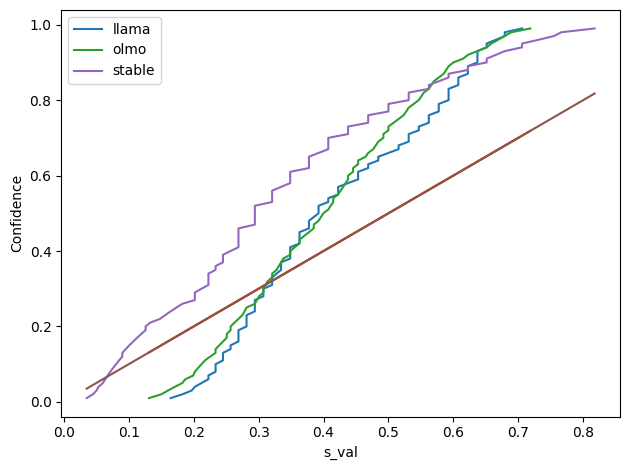

In [36]:
import math
import matplotlib.pyplot as plt
import numpy as np

a_dict_stable = get_alpha_dict('s_values_stable13b_shuffled.csv')
a_dict_olmo = get_alpha_dict('s_values_olmo13b_shuffled.csv')
a_dict_llama = get_alpha_dict('s_values_llama13b_shuffled.csv')

dict_list = [a_dict_llama, a_dict_olmo, a_dict_stable]
names = ['llama', 'olmo', 'stable']
fig, ax1 = plt.subplots(1, 1, sharex=False)
ax1.set_xlabel("s_val")
ax1.set_ylabel("Confidence")

for i, a_dict in enumerate(dict_list):
    ax1.plot(np.array(list(a_dict.values())), 1-np.array(list(a_dict.keys())), label=names[i])
    ax1.plot(np.array(list(a_dict.values())), np.array(list(a_dict.values())))
    ax1.legend()

plt.tight_layout()
print(a_dict_llama)
print(a_dict_olmo)
print(a_dict_stable)

In [37]:
import pandas as pd

df = pd.read_csv('results.csv')

# Filter rows where lowest_s_val_model differs from highest_confidence_model
disagreements = df[df['lowest_s_val_model'] != df['highest_confidence_model']]
disagreements = disagreements[disagreements['lowest_s_val_model_answer'] != disagreements['highest_confidence_model_answer']]

# Print the filtered results
print("Cases where lowest s-value model differs from highest confidence model:")
print(f"Number of disagreements: {len(disagreements)}")
print("\nDetailed disagreements:")
s_val_wins = 0
conf_wins = 0
s_val_wins_true = 0
conf_wins_true = 0
s_val_avg_s_val = 0
conf_avg_s_val = 0

conf_avg_conf = 0
s_val_avg_conf = 0
for _, row in disagreements.iterrows():
    if row['lowest_s_val_model_answer'] == row['is_base_model_correct']:
        s_val_wins += 1
        if row['is_base_model_correct']:
            s_val_wins_true += 1
        s_val_avg_s_val += min(row['llama_s_val'], row['olmo_s_val'], row['stable_s_val'])
        s_val_avg_conf += max(row['llama_confidence'], row['olmo_confidence'], row['stable_confidence'])
    elif row['highest_confidence_model_answer'] == row['is_base_model_correct']:
        conf_wins += 1
        if row['is_base_model_correct']:
            conf_wins_true += 1
        conf_avg_s_val += min(row['llama_s_val'], row['olmo_s_val'], row['stable_s_val'])
        conf_avg_conf += max(row['llama_confidence'], row['olmo_confidence'], row['stable_confidence'])

    print(f"Lowest s-val: {row['lowest_s_val_model']} ({row['lowest_s_val_model_answer']}), Highest conf: {row['highest_confidence_model']} ({row['highest_confidence_model_answer']}), Base correct: {row['is_base_model_correct']}")
print(s_val_wins, conf_wins)
print(s_val_wins_true, conf_wins_true)
print(s_val_wins - s_val_wins_true, conf_wins - conf_wins_true)
print(f"Average s-val when s-val wins: {s_val_avg_s_val/s_val_wins}")
print(f"Average s-val when conf wins: {conf_avg_s_val/conf_wins}")
print(f"Average conf when s-val wins: {s_val_avg_conf/s_val_wins}")
print(f"Average conf when conf wins: {conf_avg_conf/conf_wins}")

Cases where lowest s-value model differs from highest confidence model:
Number of disagreements: 67

Detailed disagreements:
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: False
Lowest s-val: stable (True), Highest conf: olmo (False), Base correct: True
Lowest s-val: llama (False), Highest conf: stable (True), Base correct: True
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: False
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: True
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: True
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: True
Lowest s-val: llama (False), Highest conf: olmo (True), Base correct: True
Lowest s-val: stable (True), Highest conf: olmo (False), Base correct: True
Lowest s-val: stable (True), Highest conf: olmo (False), Base correct: True
Lowest s-val: stable (True), Highest conf: llama (False), Base correct: True
Lowest s-val: stable (True), Hi

In [60]:
def find_epsilon_from_s(s_value: float, alpha_dict: dict):
    for i in range(1, 100):
        eps = i/100
        if 1 - s_value <= alpha_dict[eps]:
            continue
        return eps
    return 1

In [78]:
import pandas as pd
df_llama = pd.read_csv("s_values_llama13b_shuffled.csv")
a_dict_llama = get_alpha_dict('s_values_llama13b_shuffled.csv')
df_llama['calibrated confidence'] = df_llama['max_logits'].apply(lambda x: 1-find_epsilon_from_s(1-x, a_dict_llama))
df_llama['other confidence'] = df_llama['s_val'].apply(lambda x: 1-find_epsilon_from_s(x, a_dict_llama))
print(df_llama)


        s_val  is_jury_accurate  is_base_model_correct  is_jury_approving  \
0    0.182426              True                  False              False   
1    0.377541              True                  False              False   
2    0.651355             False                   True              False   
3    0.294215              True                  False              False   
4    0.201813              True                  False              False   
..        ...               ...                    ...                ...   
995  0.222700              True                  False              False   
996  0.607663             False                   True              False   
997  0.334589              True                  False              False   
998  0.377541              True                  False              False   
999  0.531209             False                   True              False   

     max_logits  calibrated confidence  other confidence  
0      0.817574 

<Axes: xlabel='max_logits', ylabel='calibrated confidence'>

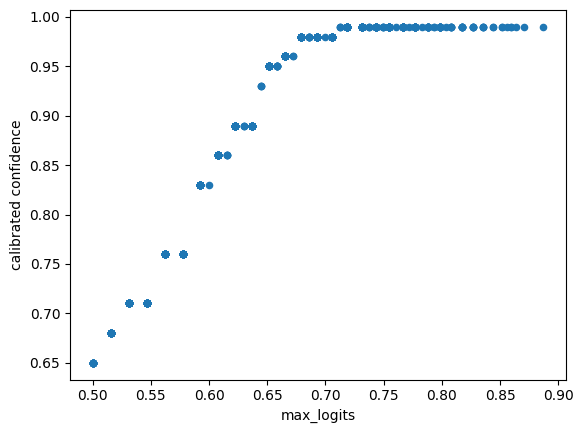

In [79]:
df_llama.plot(x='max_logits',y='calibrated confidence',kind='scatter')


<Axes: xlabel='s_val', ylabel='other confidence'>

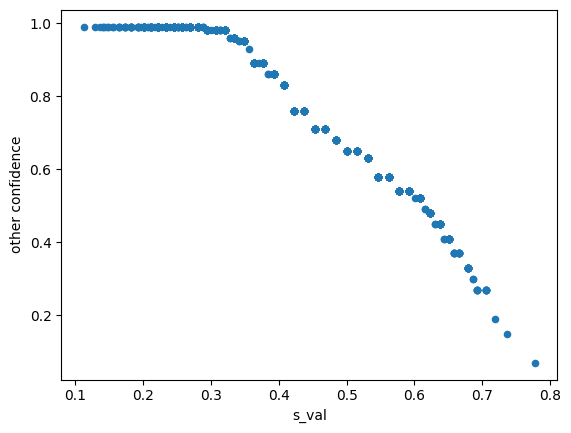

In [80]:
df_llama.plot(x='s_val',y='other confidence',kind='scatter')


(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.5467381477355957, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.562176525592804, 0.5621765255928

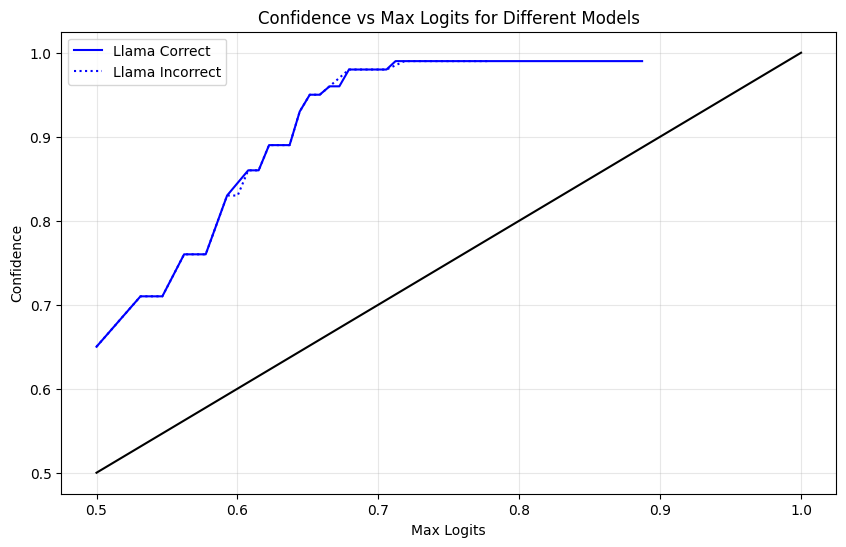

In [81]:
import pandas as pd
from pandas import DataFrame
import numpy as np

df_llama = pd.read_csv("s_values_llama13b_shuffled.csv")
df_olmo = pd.read_csv("s_values_olmo13b_shuffled.csv")
df_stable = pd.read_csv("s_values_stable13b_shuffled.csv")

# def find_epsilon_from_s(s_value: float, alpha_dict: dict):
#     for i in range(1, 100):
#         eps = i/100
#         if (1 - s_value) <= alpha_dict[eps] and s_value <= alpha_dict[eps] :
#             continue
#         return eps
#     return 1

# def find_epsilon_from_s(s_value: float, alpha_dict: dict):
#     for i in range(1, 100):
#         eps = i/100
#         if 1 - s_value <= alpha_dict[eps]:
#             continue
#         return eps
#     return 1

def separate_cor_incor(df_model: DataFrame):
    accurate_rows = df_model[df_model['is_base_model_correct'] == df_model['is_jury_approving']]
    inaccurate_rows = df_model[df_model['is_base_model_correct'] != df_model['is_jury_approving']]
    return accurate_rows, inaccurate_rows

df_llama_cors, df_llama_incors = separate_cor_incor(df_llama)
df_olmo_cors, df_olmo_incors = separate_cor_incor(df_olmo)
df_stable_cors, df_stable_incors = separate_cor_incor(df_stable)
llama_cors_conf = [1-find_epsilon_from_s(row.s_val, a_dict_llama) for _, row in df_llama_cors.iterrows()]
llama_incors_conf = [1-find_epsilon_from_s(row.s_val, a_dict_llama) for _, row in df_llama_incors.iterrows()]
olmo_cors_conf = [1-find_epsilon_from_s(row.s_val, a_dict_olmo) for _, row in df_olmo_cors.iterrows()]
olmo_incors_conf = [1-find_epsilon_from_s(row.s_val, a_dict_olmo) for _, row in df_olmo_incors.iterrows()]
stable_cors_conf = [1-find_epsilon_from_s(row.s_val, a_dict_stable) for _, row in df_stable_cors.iterrows()]
stable_incors_conf = [1-find_epsilon_from_s(row.s_val, a_dict_stable) for _, row in df_stable_incors.iterrows()]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Sort data points for proper line plotting
def sort_for_line(x, y):
    points = list(zip(x, y))
    points.sort(key=lambda p: p[0])
    return zip(*points)

x_diag_col = np.linspace(0.5, 1, 50)
y_diag_col = x_diag_col
plt.plot(x_diag_col, y_diag_col, color='black')

# Llama data
x_llama_cor, y_llama_cor = sort_for_line(df_llama_cors['max_logits'], llama_cors_conf)
x_llama_incor, y_llama_incor = sort_for_line(df_llama_incors['max_logits'], llama_incors_conf)
plt.plot(x_llama_cor, y_llama_cor, color='blue', label='Llama Correct')
plt.plot(x_llama_incor, y_llama_incor, color='blue', linestyle=':', label='Llama Incorrect')

# # OLMo data
# x_olmo_cor, y_olmo_cor = sort_for_line(df_olmo_cors['max_logits'], olmo_cors_conf)
# x_olmo_incor, y_olmo_incor = sort_for_line(df_olmo_incors['max_logits'], olmo_incors_conf)
# plt.plot(x_olmo_cor, y_olmo_cor, color='red', label='OLMo Correct')
# plt.plot(x_olmo_incor, y_olmo_incor, color='red', linestyle=':', label='OLMo Incorrect')

# # Stable data
# x_stable_cor, y_stable_cor = sort_for_line(df_stable_cors['max_logits'], stable_cors_conf)
# x_stable_incor, y_stable_incor = sort_for_line(df_stable_incors['max_logits'], stable_incors_conf)
# plt.plot(x_stable_cor, y_stable_cor, color='green', label='Stable Correct')
# plt.plot(x_stable_incor, y_stable_incor, color='green', linestyle=':', label='Stable Incorrect')

plt.xlabel('Max Logits')
plt.ylabel('Confidence')
plt.title('Confidence vs Max Logits for Different Models')
plt.legend()
plt.grid(True, alpha=0.3)


print(x_stable_cor)
print(x_stable_incor)


In [87]:
df_stable = pd.read_csv("s_values_stable13b_test_shuffled.csv")
max_logit = df_stable['max_logits'].tolist()
print(sorted(max_logit))


[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5156199336051941, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908, 0.531209409236908

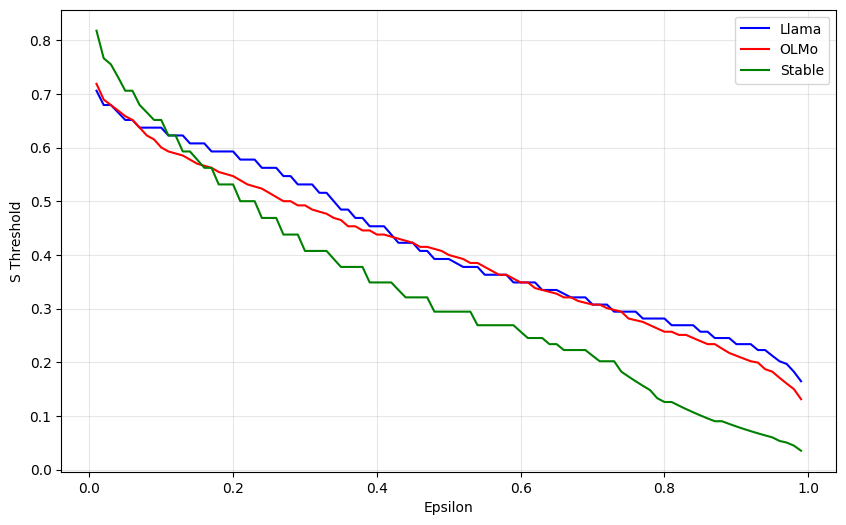

In [53]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot data from dictionaries
plt.plot(list(a_dict_llama.keys()), list(a_dict_llama.values()), label='Llama', color='blue')
plt.plot(list(a_dict_olmo.keys()), list(a_dict_olmo.values()), label='OLMo', color='red') 
plt.plot(list(a_dict_stable.keys()), list(a_dict_stable.values()), label='Stable', color='green')

plt.xlabel('Epsilon')
plt.ylabel('S Threshold')
plt.legend()
plt.grid(True, alpha=0.3)


# df_stable = pd.read_csv("s_values_stable13b_shuffled.csv")
# s_vals = list(zip(df_stable['s_val'], df_stable['is_jury_accurate'], df_stable['max_logits']))
# s_vals.sort()
# print(s_vals[0:3])
# max_value_dict_true = {}
# max_value_dict_false = {}
# epsilon_indices = [math.ceil((i/100)*len(s_vals)) for i in range(1, 100)]
# for i, index in enumerate(epsilon_indices):
#     ind = (i+1)*0.01
#     ind = round(ind, 2)
#     count = 0
#     if s_vals[index][1]:
#         max_value_dict_true[ind] = s_vals[index][2]
#     else:
#         max_value_dict_false[ind] = s_vals[index][2]

# fig, ax1 = plt.subplots(2, 1, sharex=False)
# ax1[0].set_xlabel("Max Logits")
# ax1[0].set_ylabel("Confidence")
# ax1[1].set_xlabel("Max Logits")
# ax1[1].set_ylabel("Confidence")

# ax1[0].plot(np.array(list(max_value_dict_true.values())), 1-np.array(list(max_value_dict_true.keys())), label="Jury accurate")
# x=np.array(list(max_value_dict_true.values()))
# ax1[0].plot(x,x)
# ax1[1].plot(np.array(list(max_value_dict_false.values())), 1-np.array(list(max_value_dict_false.keys())), label="Jury inaccurate")
# ax1[1].plot(x,x)
# plt.legend()
# plt.tight_layout()
